In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
start_df = pd.read_csv("data/2015/INMET_SE_RJ_A610_PICO DO COUTO_01-01-2015_A_31-12-2015_TRATADO.CSV")
start_df.head()

,DATA,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
0,2015-01-01 00:00:00,3.8,833.6,833.6,833.1,14.5,13.6
1,2015-01-01 01:00:00,3.6,833.2,833.6,833.2,16.5,13.7
2,2015-01-01 02:00:00,0.2,833.0,833.3,832.9,17.9,16.0
3,2015-01-01 03:00:00,0.2,831.7,832.9,831.7,17.9,16.4
4,2015-01-01 04:00:00,0.0,830.8,831.7,830.7,20.3,17.1


In [124]:
start_df.describe()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
count,4649.000000,4748.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,0.096279,833.299916,833.520932,833.103898,14.229174,13.152733
std,0.524484,2.439028,2.408621,2.453548,3.845879,3.429431
min,0.000000,824.800000,824.900000,824.400000,5.300000,3.600000
25%,0.000000,831.700000,831.900000,831.500000,11.500000,10.800000
50%,0.000000,833.200000,833.400000,833.000000,13.300000,12.300000
75%,0.000000,834.900000,835.100000,834.700000,16.500000,15.125000
max,14.600000,841.800000,841.900000,841.600000,29.900000,25.700000


In [125]:
# Set dataset date column as index
df = start_df.copy()
df["DATA"] = pd.to_datetime(start_df["DATA"])
df = df.set_index("DATA").resample('D').mean()
df.head()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
DATA,,,,,,
2015-01-01,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Looking for the best way to fill the gaps in the data.

original = df.copy()

fill_gaps_options = {
    "df_ffill": df.ffill(),
    "df_spline": df.interpolate(method="spline", order=1),
    "df_linear": df.interpolate(method="linear"),
    "df_mean": df.fillna(df.mean()),
}

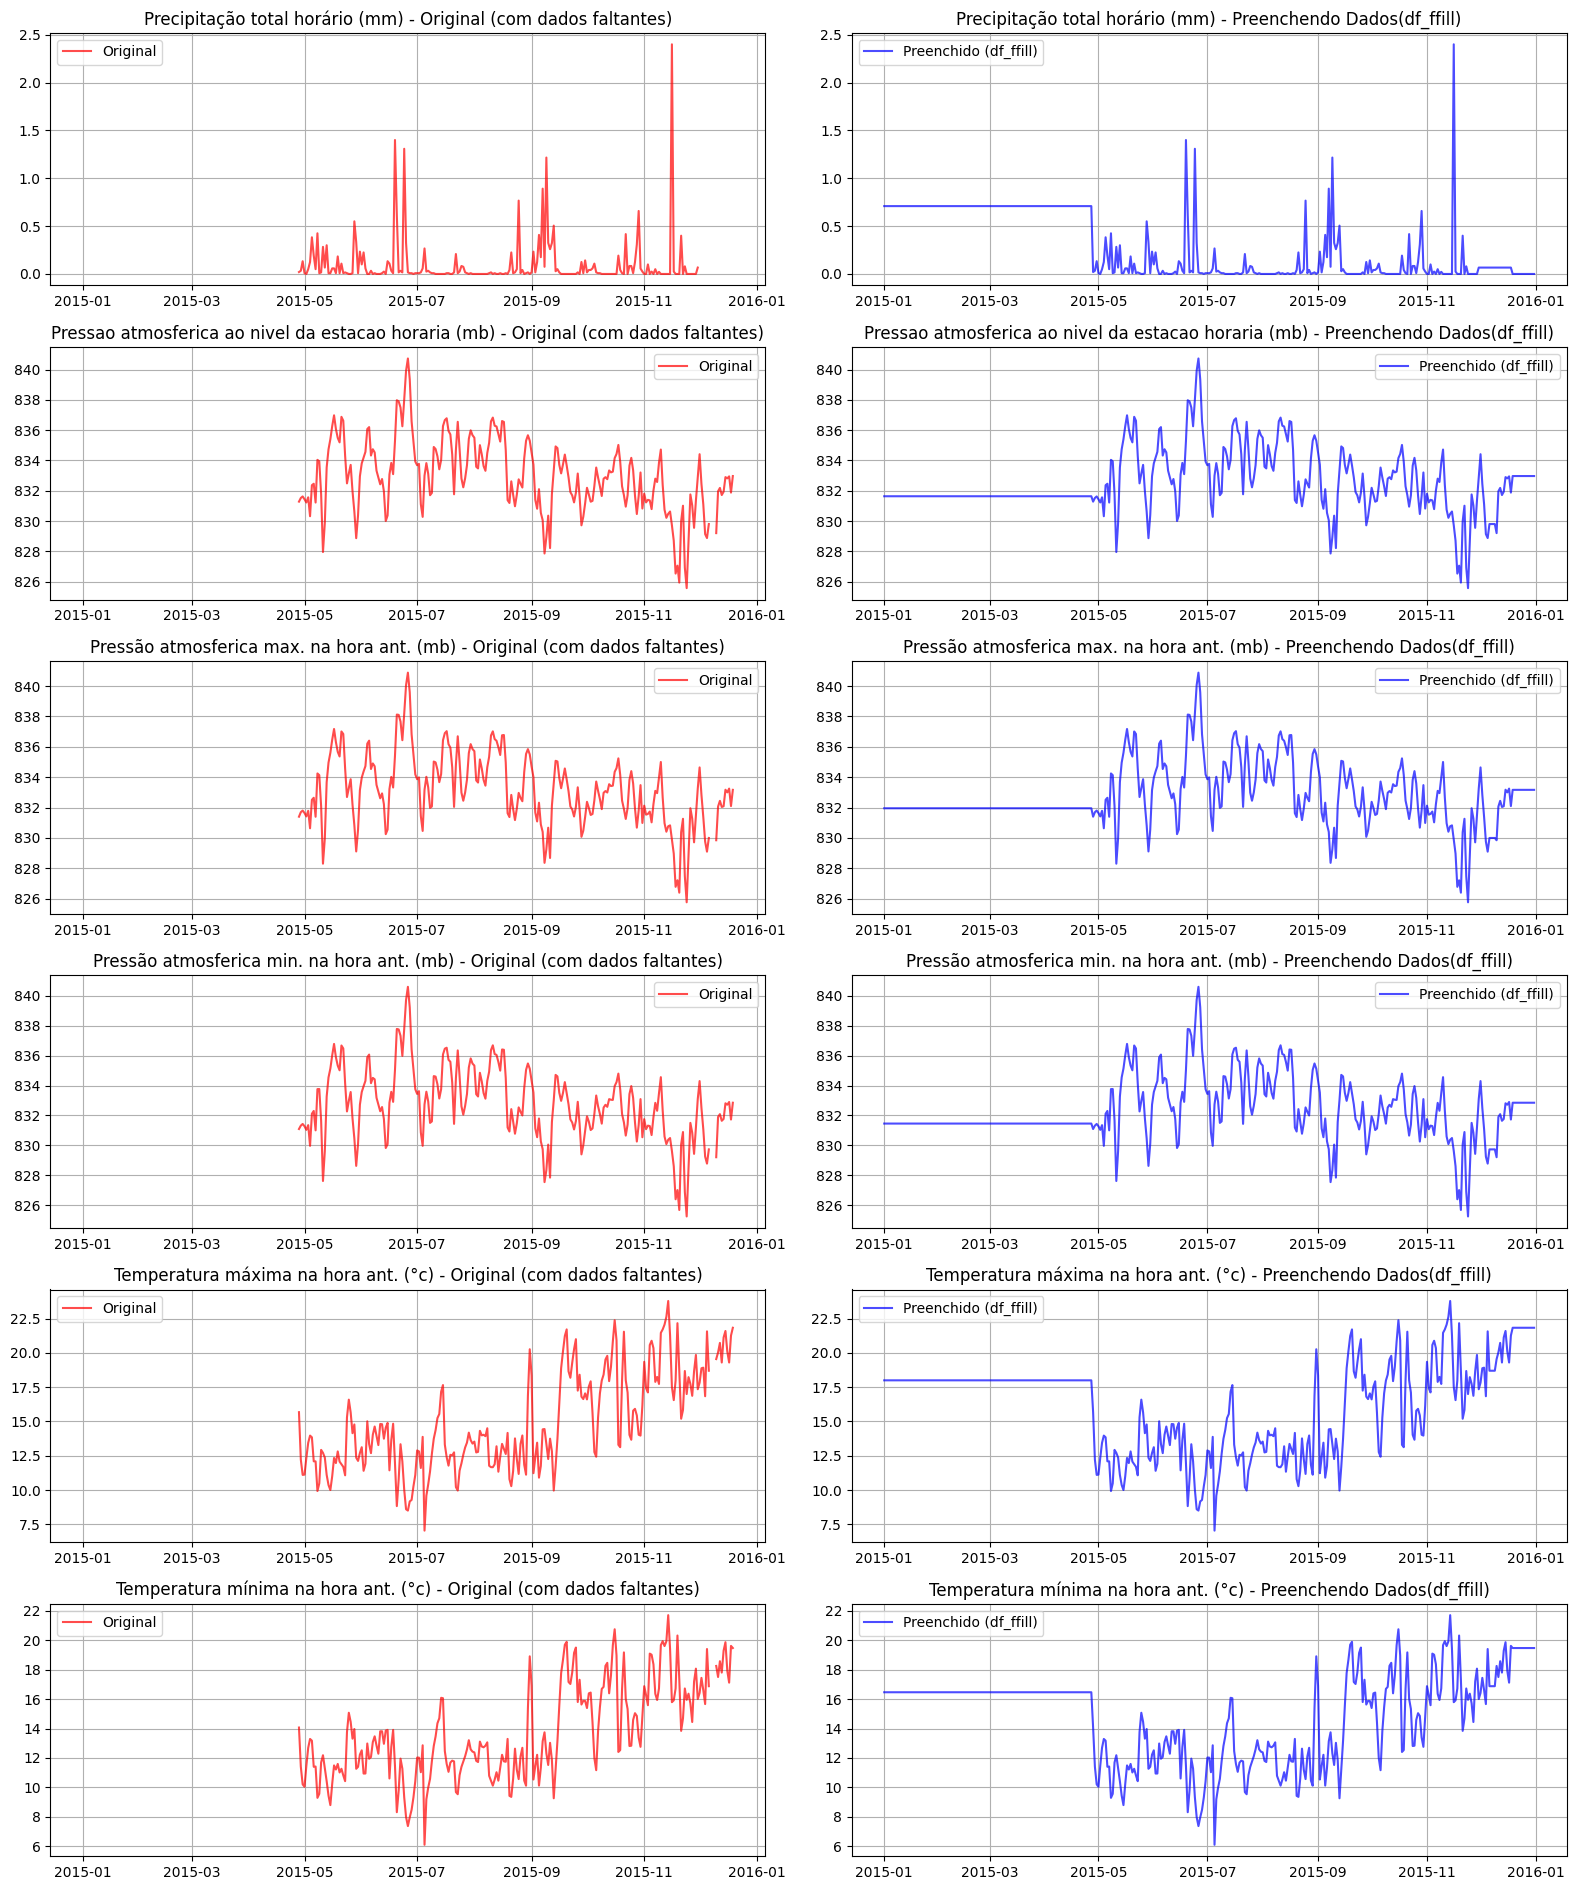

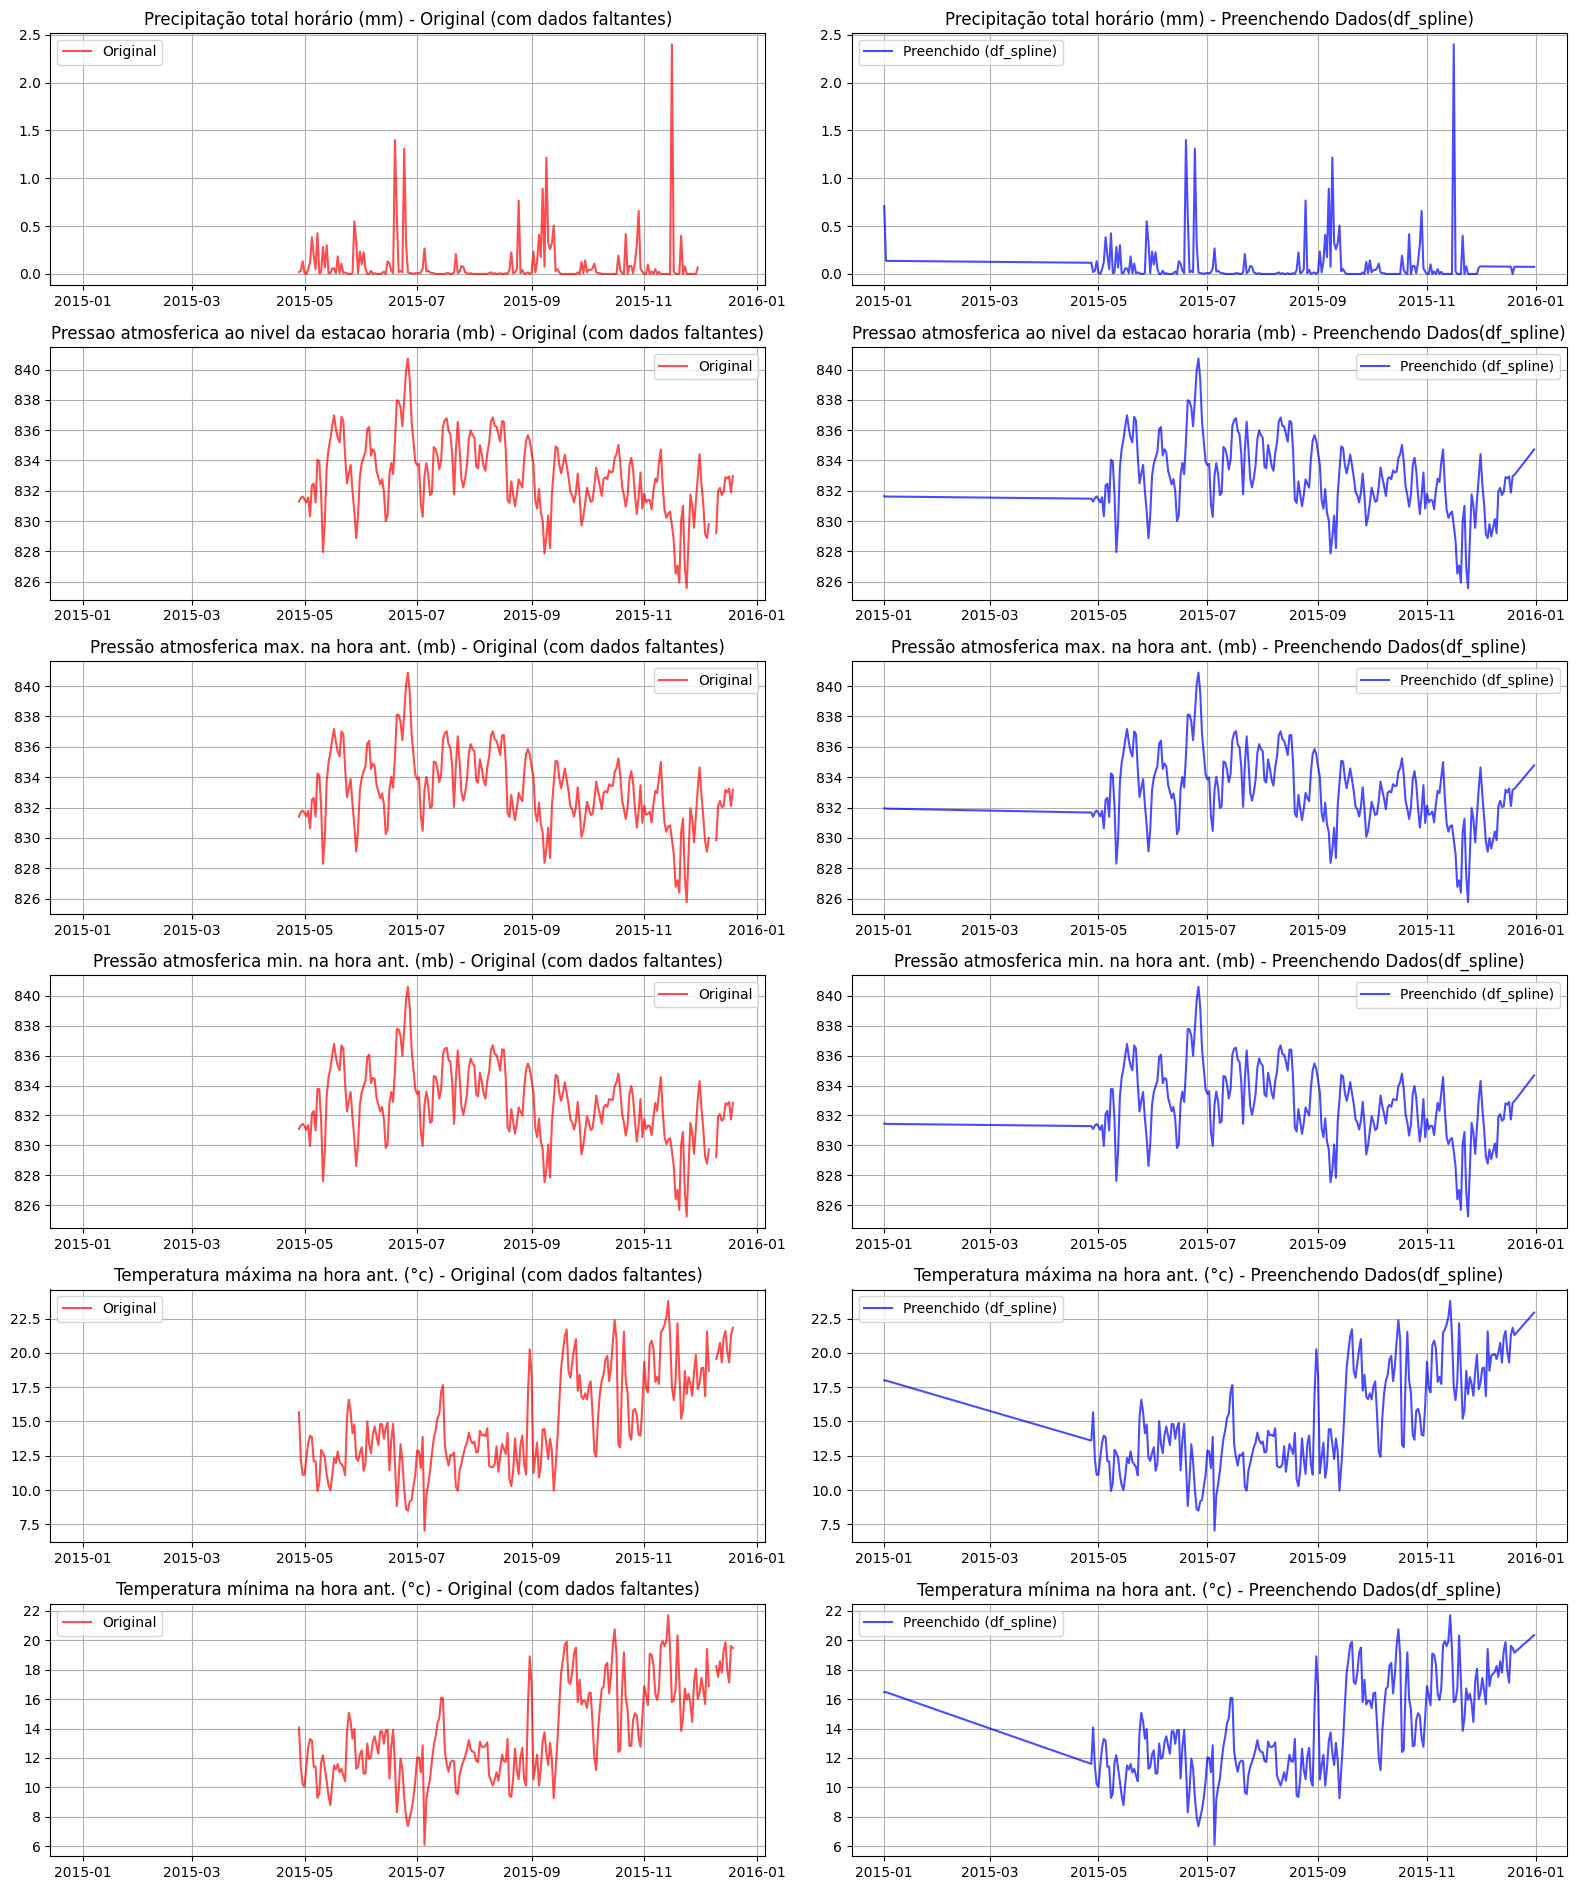

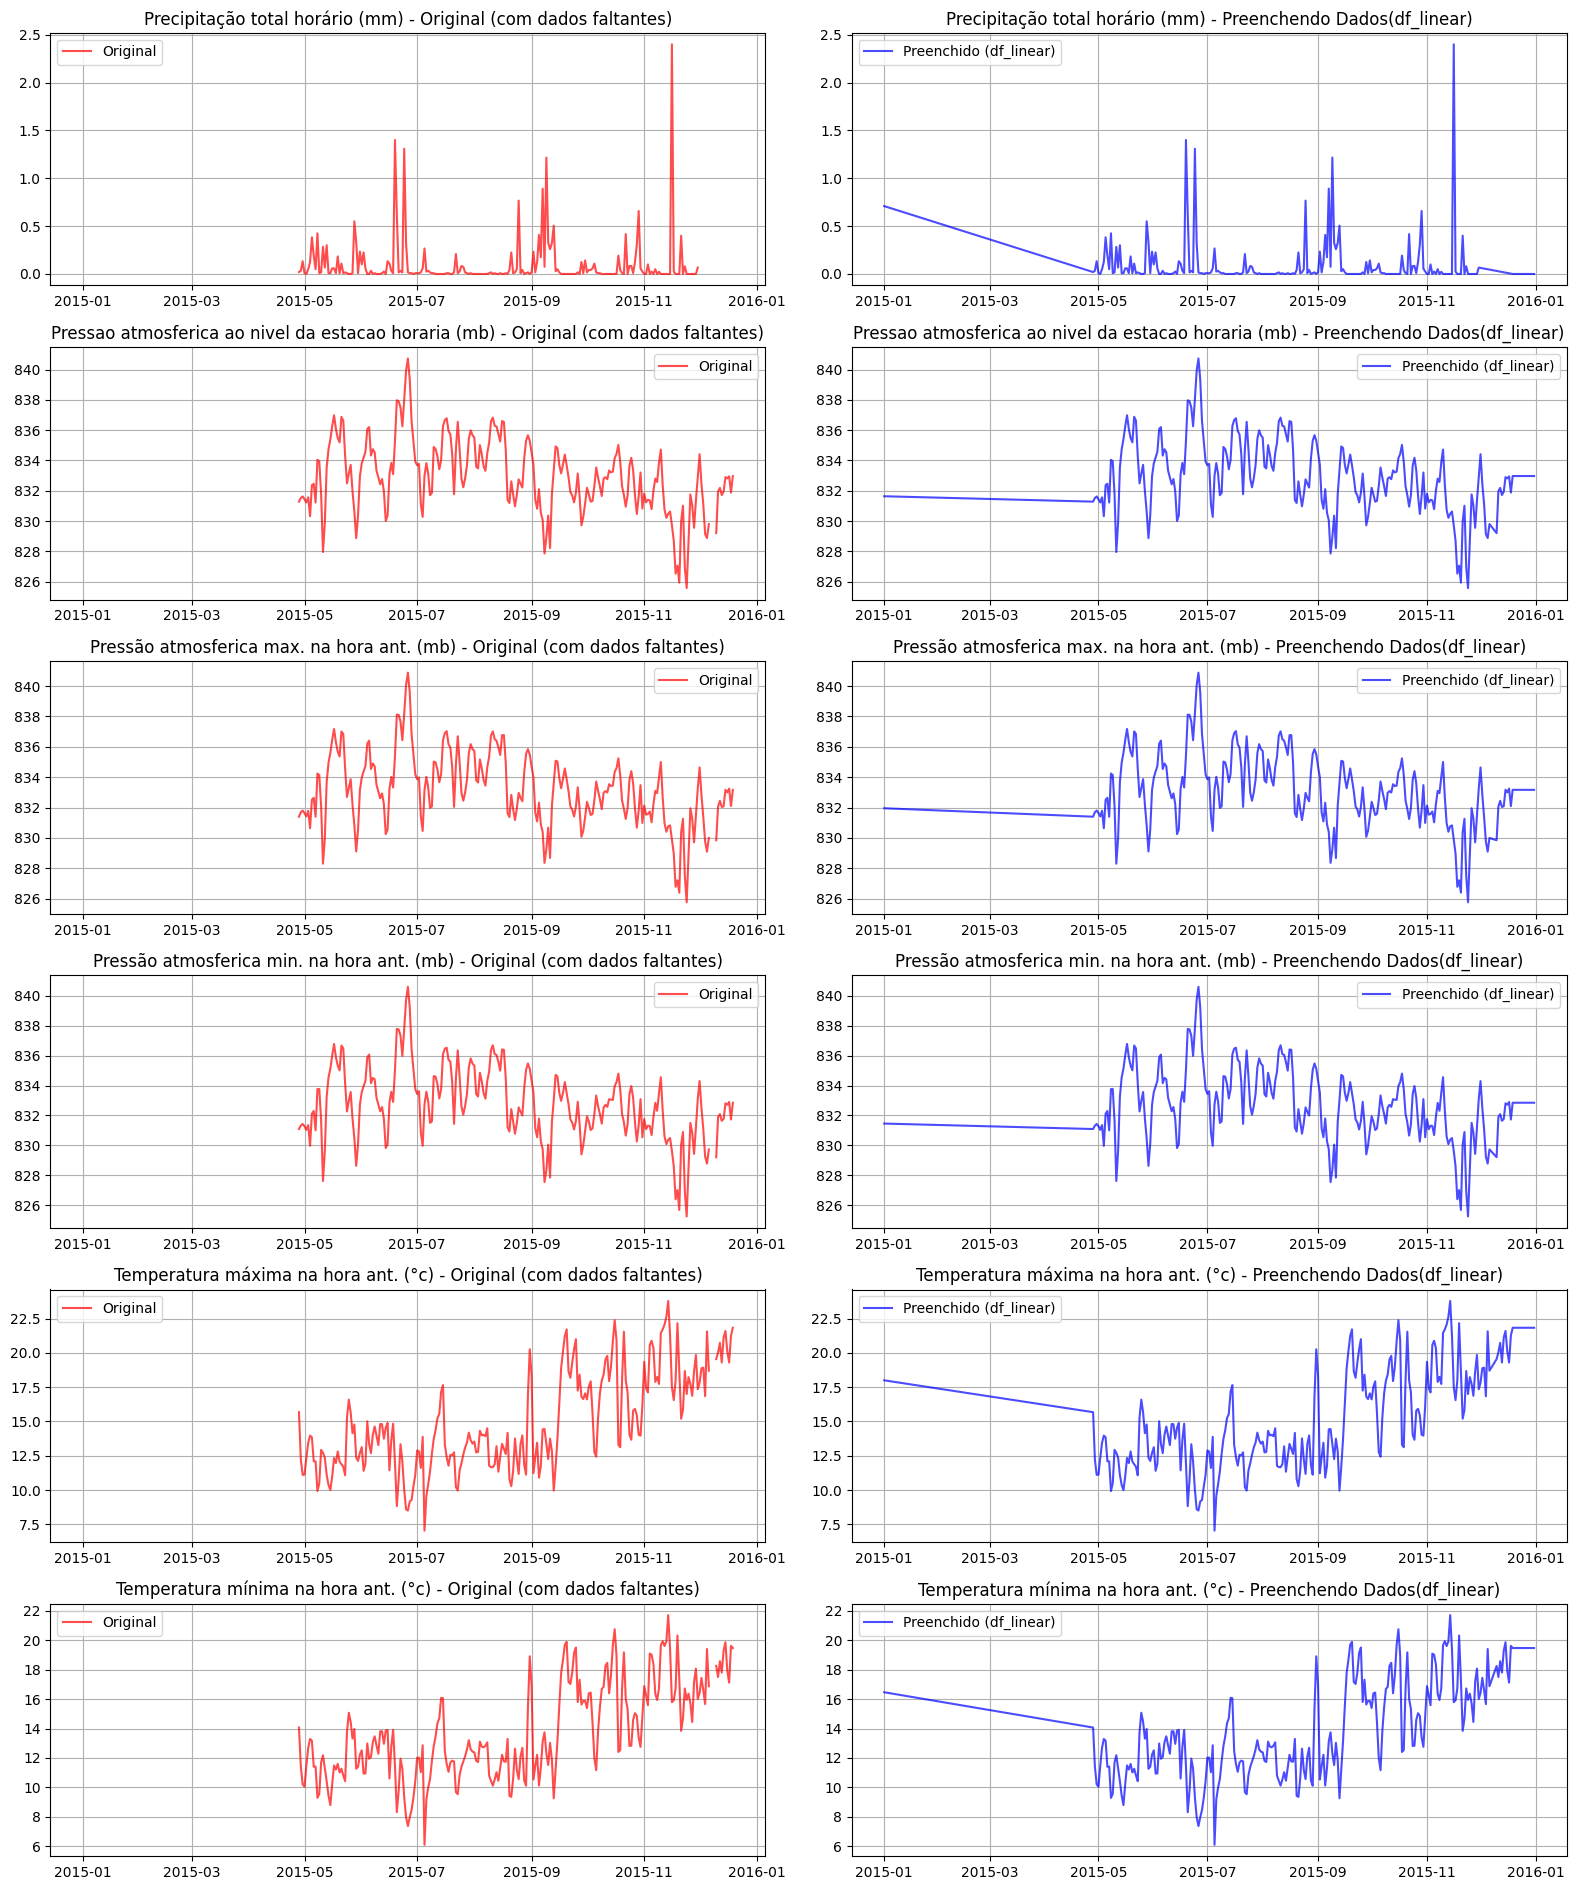

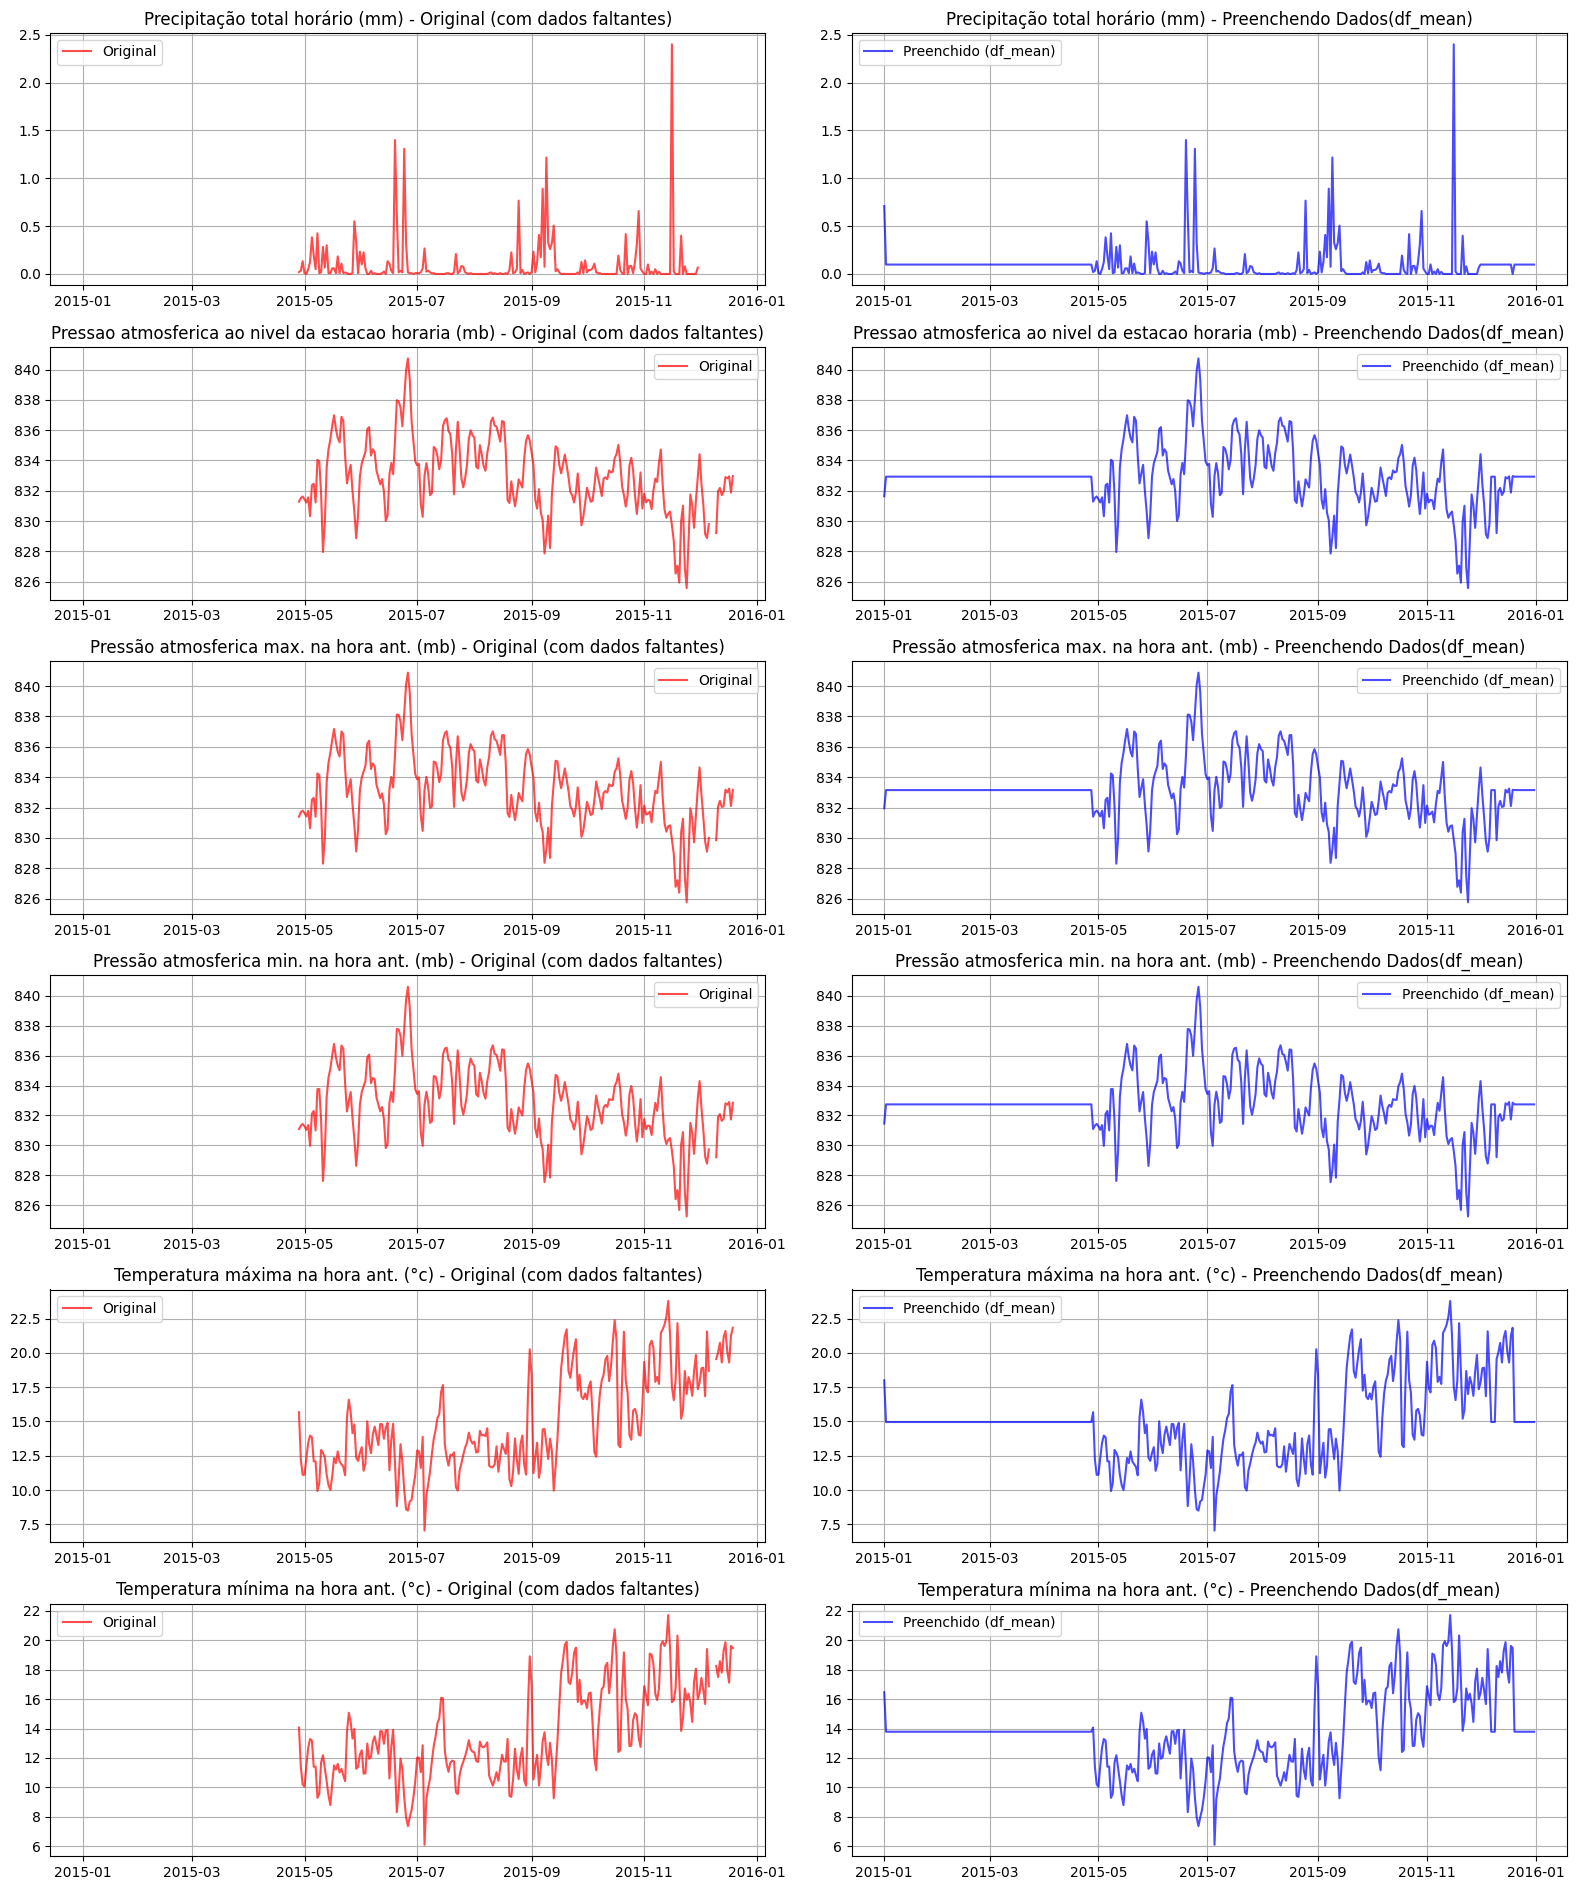

In [108]:
# Plot results
import os
from pathlib import Path


output_folder = Path("data/2015/fill_gaps_options")
os.makedirs(output_folder, exist_ok=True)

features = list(df.columns)

for method, result_df in fill_gaps_options.items():
    fig, axes = plt.subplots(len(features), 2, figsize=(16, 3 * len(features) + 1))
    for i, feature in enumerate(features):
        # Original data
        axes[i, 0].plot(df.index, df[feature], label='Original', color='red', alpha=0.7)
        axes[i, 0].set_title(f'{feature.capitalize()} - Original (com dados faltantes)')
        axes[i, 0].grid()
        axes[i, 0].legend()

        # Filled data
        axes[i, 1].plot(result_df.index, result_df[feature], label=f'Preenchido ({method})', color='blue', alpha=0.7)
        axes[i, 1].set_title(f'{feature.capitalize()} - Preenchendo Dados({method})')
        axes[i, 1].grid()
        axes[i, 1].legend()

    fig.tight_layout()
    fig.savefig(output_folder / f"{method}.png")

In [117]:
# Going with ffill beacuse it better respects the data behaviour

df = fill_gaps_options["df_ffill"]
df.head()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
DATA,,,,,,
2015-01-01,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-02,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-03,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-04,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-05,0.709091,831.636364,831.954545,831.454545,18.0,16.463636


In [118]:
# Descritive statistics

df.describe()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.287535,832.494777,832.745424,832.309553,16.182950,14.847117
std,0.350542,2.052054,2.013139,2.053772,3.333975,2.969629
min,0.000000,825.566667,825.766667,825.233333,7.041667,6.104167
25%,0.000000,831.636364,831.954545,831.454545,13.312500,12.229167
50%,0.066667,831.636364,831.954545,831.454545,18.000000,16.463636
75%,0.709091,833.541667,833.712500,833.333333,18.000000,16.463636
max,2.400000,840.737500,840.879167,840.612500,23.785714,21.700000


In [121]:
# Normalizing the data to use the SARIMAX model

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
norm_df = df.copy()
norm_df[features] = scaler.fit_transform(df[features])
norm_df.head()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
DATA,,,,,,
2015-01-01,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-02,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-03,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-04,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-05,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098


In [122]:
# Exporting data
output_folder = Path("data/2015")
df.describe().to_csv(output_folder / "INMET_SE_RJ_A610_PICO DO COUTO_01-01-2015_A_31-12-2015_DESCRITIVA_MENSAL.CSV")
norm_df.to_csv(output_folder / "INMET_SE_RJ_A610_PICO DO COUTO_01-01-2015_A_31-12-2015_NORMALIZADO.CSV")